In [26]:
# from sif.sifinfra import sif_utils as su
import os
import sklearn
import numpy as np
import datetime
import yfinance as yf
import pandas as pd

In [27]:
SandP500_list = ['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'AAP',
 'AMD', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE',
 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP',
 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM',
 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK',
 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BBWI', 'BAX', 'BDX', 'BRK.B',
 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY',
 'AVGO', 'BR', 'BRO', 'BF.B', 'CHRW', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'KMX', 'CCL',
 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CERN', 'CF',
 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG',
 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ',
 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI',
 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH',
 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DRE', 'DD', 'DXC', 'EMN', 'ETN',
 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'LLY', 'EMR', 'ENPH', 'ETR', 'EOG', 'EFX', 'EQIX', 'EQR',
 'ESS', 'EL', 'ETSY', 'RE', 'EVRG', 'ES', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FB',
 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FRC', 'FE', 'FISV', 'FLT', 'FMC', 'F', 'FTNT', 'FTV',
 'FBHS', 'FOXA', 'FOX', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GNRC', 'GD', 'GE', 'GIS', 'GM',
 'GPC', 'GILD', 'GPN', 'GL', 'GS', 'HAL', 'HBI', 'HAS', 'HCA', 'PEAK', 'HSIC', 'HES', 'HPE',
 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IBM', 'IEX',
 'IDXX', 'INFO', 'ITW', 'ILMN', 'INCY', 'IR', 'INTC', 'ICE', 'IFF', 'IP', 'IPG', 'INTU', 'ISRG',
 'IVZ', 'IPGP', 'IQV', 'IRM', 'JBHT', 'JKHY', 'J', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K',
 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LEG',
 'LDOS', 'LEN', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LUMN', 'LYB', 'MTB', 'MRO', 'MPC',
 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD',
 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MSI',
 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NSC', 'NTRS',
 'NOC', 'NLOK', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'OKE', 'ORCL',
 'OGN', 'OTIS', 'PCAR', 'PKG', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PENN', 'PNR', 'PBCT', 'PEP', 'PKI', 'PFE',
 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PTC', 'PEG',
 'PSA', 'PHM', 'PVH', 'QRVO', 'QCOM', 'PWR', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG',
 'RMD', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE',
 'NOW', 'SHW', 'SPG', 'SWKS', 'SNA', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STE', 'SYK', 'SIVB', 'SYF',
 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TGT', 'TEL', 'TDY', 'TFX', 'TER', 'TSLA', 'TXN', 'TXT',
 'COO', 'HIG', 'HSY', 'MOS', 'TRV', 'DIS', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRMB', 'TFC', 'TWTR',
 'TYL', 'TSN', 'USB', 'UDR', 'ULTA', 'UAA', 'UA', 'UNP', 'UAL', 'UPS', 'URI', 'UNH', 'UHS', 'VLO',
 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VIAC', 'VTRS', 'V', 'VNO', 'VMC', 'WRB', 'GWW', 'WAB',
 'WBA', 'WMT', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW',
 'WYNN', 'XEL', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS']

Download SPY data, which will be the independent variable for each regression. 
We consider SPY to be the market, universe of stocks (technically an approximation but whatever)

In [28]:
start_date = datetime.datetime(2016, 1, 1)
end_date = datetime.datetime(2020, 1, 1)

sp = yf.download('SPY', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


Download data for all stocks in our universe

In [29]:
# regression_stocks = ['GOOGL', 'AMZN', 'CNC']
# regression_stocks = SandP500_list[:10]
# for ticker in regression_stocks:
#     closing_prices[ticker] = yf.download(ticker, start=start_date, end=end_date)["Close"]
universe_data = yf.download(SandP500_list, start=start_date, end=end_date)

[*                      3%                       ]  15 of 505 completedGot error from yahoo api for ticker WLTW, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[*****                 10%                       ]  52 of 505 completedGot error from yahoo api for ticker XLNX, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[*****                 11%                       ]  58 of 505 completedGot error from yahoo api for ticker DISCA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[****************      34%                       ]  174 of 505 completedGot error from yahoo api for ticker VIAC, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[*****************     36%                       ]  181 of 505 completedGot error from yahoo api for ticker KSU, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[*******

Clean data, get closing prices, remove stocks with NaN data

In [67]:
# closing_prices
# tickers = closing_prices.columns
# print(tickers)
closing_prices = universe_data['Close']
closing_prices = closing_prices.dropna(axis=1, how='any')
# closing_prices
# print(closing_prices.isnull().values.any())
# tickers

Make an additional column, representing a portfolio comprised of all stocks in our universe

In [69]:
closing_prices["Portfolio"] = closing_prices.sum(axis=1)
closing_prices["SPY"] = sp["Close"]
closing_prices

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,Portfolio,SPY
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,40.689999,40.910000,152.240005,26.337500,57.610001,101.870003,85.239998,42.930000,101.830002,91.970001,...,77.459999,58.860001,36.080002,51.912292,98.844658,66.489998,26.709999,47.270000,73946.031783,201.020004
2016-01-05,40.549999,40.520000,151.199997,25.677500,57.369999,103.360001,85.000000,42.919998,102.360001,92.339996,...,78.120003,60.060001,36.070000,51.782890,100.902916,64.820000,26.420000,48.009998,74109.996473,201.360001
2016-01-06,40.730000,41.230000,147.199997,25.174999,57.380001,101.779999,85.300003,42.560001,102.160004,91.019997,...,77.470001,59.189999,35.619999,51.416248,101.339806,62.230000,25.650000,48.020000,73155.231134,198.820007
2016-01-07,39.000000,40.450001,148.830002,24.112499,57.209999,98.529999,81.919998,41.540001,99.160004,89.110001,...,76.230003,58.669998,34.700001,49.662113,99.009712,59.410000,24.879999,46.560001,71544.839381,194.050003
2016-01-08,38.590000,40.369999,145.559998,24.240000,55.650002,97.959999,84.580002,40.669998,98.199997,87.849998,...,74.690002,56.990002,34.369999,48.986340,98.592232,59.250000,24.600000,45.880001,70691.534520,191.919998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,85.300003,29.180000,160.570007,71.067497,89.849998,85.419998,172.300003,87.279999,211.610001,329.640015,...,70.019997,57.209999,78.639999,100.330002,146.475723,254.330002,51.529999,132.919998,127253.417698,321.230011
2019-12-26,85.449997,29.670000,159.270004,72.477501,89.830002,85.050003,171.009995,87.279999,212.050003,331.200012,...,70.129997,56.529999,78.599998,101.790001,145.922333,254.419998,51.660000,133.029999,127516.376909,322.940002
2019-12-27,85.419998,28.440001,158.350006,72.449997,89.199997,84.910004,169.270004,87.400002,212.220001,330.790009,...,69.889999,56.840000,78.839996,101.900002,145.640778,256.000000,51.500000,133.250000,127461.920586,322.859985


In [71]:
# predict percent change rather than quantity of change

# drop first row, which is NaN
closing_changes = closing_prices.pct_change().iloc[1: , :]
closing_changes = closing_changes.dropna(axis=1, how='any')
# closing_changes
# spy_changes = sp.pct_change().iloc[1: , :]["Close"]
spy_changes = closing_changes["SPY"]
# spy_changes

closing_changes

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,Portfolio,SPY
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-0.003441,-0.009533,-0.006831,-0.025059,-0.004166,0.014626,-0.002816,-0.000233,0.005205,0.004023,...,0.008521,0.020387,-0.000277,-0.002493,0.020823,-0.025117,-0.010857,0.015655,0.002217,0.001691
2016-01-06,0.004439,0.017522,-0.026455,-0.019570,0.000174,-0.015286,0.003529,-0.008388,-0.001954,-0.014295,...,-0.008321,-0.014486,-0.012476,-0.007080,0.004330,-0.039957,-0.029145,0.000208,-0.012883,-0.012614
2016-01-07,-0.042475,-0.018918,0.011073,-0.042205,-0.002963,-0.031932,-0.039625,-0.023966,-0.029366,-0.020984,...,-0.016006,-0.008785,-0.025828,-0.034116,-0.022993,-0.045316,-0.030020,-0.030404,-0.022013,-0.023992
2016-01-08,-0.010513,-0.001978,-0.021971,0.005288,-0.027268,-0.005785,0.032471,-0.020944,-0.009681,-0.014140,...,-0.020202,-0.028635,-0.009510,-0.013607,-0.004217,-0.002693,-0.011254,-0.014605,-0.011927,-0.010977
2016-01-11,-0.016844,0.017587,0.010236,0.016192,-0.031806,-0.039812,0.004966,0.001475,0.010489,0.017416,...,-0.013389,-0.019477,-0.008438,-0.001761,-0.017233,-0.006582,-0.019919,-0.028335,-0.001412,0.000990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,0.000469,-0.004096,0.003751,0.000951,-0.004432,-0.002103,0.010913,-0.000801,0.003700,0.002098,...,-0.003841,0.000525,-0.003927,0.005210,-0.002446,-0.009348,0.003701,0.004155,0.001180,0.000031
2019-12-26,0.001758,0.016792,-0.008096,0.019840,-0.000223,-0.004331,-0.007487,0.000000,0.002079,0.004732,...,0.001571,-0.011886,-0.000509,0.014552,-0.003778,0.000354,0.002523,0.000828,0.002066,0.005323
2019-12-27,-0.000351,-0.041456,-0.005776,-0.000379,-0.007013,-0.001646,-0.010175,0.001375,0.000802,-0.001238,...,-0.003422,0.005484,0.003053,0.001081,-0.001929,0.006210,-0.003097,0.001654,-0.000427,-0.000248


Perform regression for all stocks

In [72]:
from sklearn import linear_model
import matplotlib.pyplot as plt

# spy_closing = sp['Close']
# X_data = np.expand_dims(spy_closing, axis=1)
X_data = np.expand_dims(spy_changes, axis=1)
# print(X_data.shape)

tickers = closing_changes.columns
alphas = []
betas = []
scores = []
regressions = {}

for ticker in tickers:
    reg = linear_model.LinearRegression(fit_intercept =True)
    # df1 = closing_prices[['SPY', ticker]]
    # X data is spy_changes
    # y_data = closing_prices[ticker]
    
    y_data = closing_changes[ticker]
    reg.fit(X_data, y_data)
    # y_pred = reg.predict(X_data)
    # print(reg.score())
    # plt.scatter(X_data, y_pred)
    # plt.plot(X_data, y_pred)
    # plt.show()
    alphas.append(reg.intercept_)
    betas.append(reg.coef_[0])
    scores.append(reg.score(X_data, y_data))
    regressions[ticker] = reg
    # print(reg.coef_)
    # print(reg.intercept_)
    # print(reg.summary)

In [73]:
# print(alpha_dict)
# print(beta_dict)
# print(score_dict)

# regression_df = pd.DataFrame(alpha_dict, beta_dict, score_dict)
regression_df = pd.DataFrame({"Ticker": tickers, "Alpha": alphas, "Beta": betas, "Score": scores})
regression_df = regression_df.set_index("Ticker")
regression_df

,Alpha,Beta,Score
Ticker,,,
A,2.389215e-04,1.206650,0.452637
AAL,-8.470736e-04,1.482467,0.292313
AAP,-1.393966e-04,0.778482,0.100479
AAPL,4.996835e-04,1.273628,0.455944
ABBV,7.779045e-05,1.003293,0.219551
...,...,...,...
ZBRA,9.034577e-04,1.429995,0.240725
ZION,1.873797e-04,1.231004,0.351421
ZTS,6.277692e-04,0.958904,0.361573


In [74]:
print("Average Beta is " + str(regression_df["Beta"].mean()))
print("Lowest Beta is " + str(regression_df["Beta"].min()))

Average Beta is 0.979943899236065
Lowest Beta is 0.052192801250456076


Show excess return graphs, compare predicted to actual returns

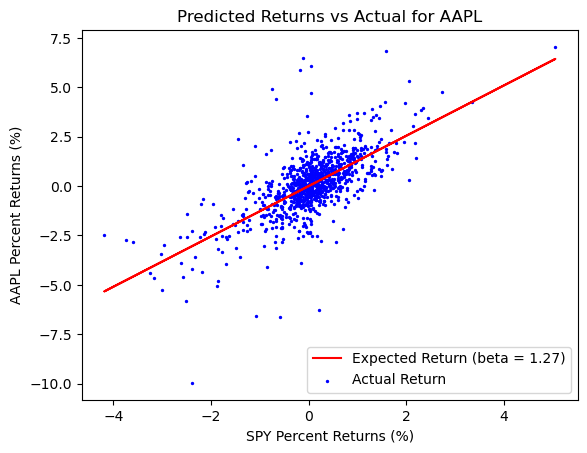

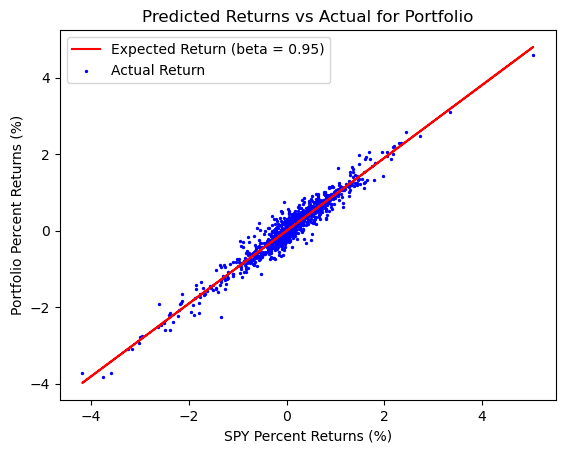

In [77]:
def graph_predicted_returns(graph_ticker):
    X_data = np.expand_dims(spy_changes, axis=1)*100
    y_data = closing_changes[graph_ticker]*100
    y_pred = regressions[graph_ticker].predict(X_data)


    plt.plot(X_data, y_pred, color='red')
    plt.scatter(X_data, y_data, color='blue', s=2)
    plt.title("Predicted Returns vs Actual for " + graph_ticker)
    plt.xlabel("SPY Percent Returns (%)")
    plt.ylabel(graph_ticker + " Percent Returns (%)")

    ticker_beta = round(regression_df.loc[graph_ticker, "Beta"], 2)
    plt.legend([f"Expected Return (beta = {ticker_beta})", "Actual Return"])

    plt.show()
graph_predicted_returns("AAPL")
graph_predicted_returns("Portfolio")